In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
price_dataset=pd.read_excel('airprice.xlsx')

In [58]:
price_dataset.head()

,Price,journey_day,journey_month,departure_hours,departure_minutes,arrival_hours,arrival_minutes,duration_hours,duration_minutes
0,3897,24,3,22,20,1,10,2,160
1,7662,1,5,5,50,13,15,7,69
2,13882,9,6,9,25,4,25,19,42528
3,6218,12,5,18,5,23,30,5,69
4,13302,1,3,16,50,21,35,4,133


In [5]:
test_dataset=pd.read_excel('Test_set.xlsx')

In [6]:
test_dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [7]:
price_dataset.dropna(inplace=True)
airline=price_dataset[['Airline']]
airline=pd.get_dummies(airline,drop_first=True)
price_dataset.drop(['Airline'],axis=1,inplace=True)
price_dataset['journey_day']=pd.to_datetime(price_dataset.Date_of_Journey,format="%d/%m/%Y").dt.day
price_dataset['journey_month']=pd.to_datetime(price_dataset.Date_of_Journey,format="%d/%m/%Y").dt.month
price_dataset['departure_hours']=pd.to_datetime(price_dataset['Dep_Time']).dt.hour
price_dataset['departure_minutes']=pd.to_datetime(price_dataset['Dep_Time']).dt.minute
price_dataset.drop(['Date_of_Journey'],axis=1,inplace=True)
price_dataset.drop(['Dep_Time'],axis=1,inplace=True)
price_dataset['arrival_hours']=pd.to_datetime(price_dataset['Arrival_Time']).dt.hour
price_dataset['arrival_minutes']=pd.to_datetime(price_dataset['Arrival_Time']).dt.minute
price_dataset.drop(['Arrival_Time'],axis=1,inplace=True)
duration=list(price_dataset['Duration'])
for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if 'h' in duration[i]:
            duration[i]=duration[i].strip()+'0m'
        else:
            duration[i]='0h'+duration[i]

duration_hours=[]
duration_minutes=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_minutes.append(int(duration[i].split(sep = "m")[0].split()[-1],base=32))
    
price_dataset['duration_hours']=duration_hours
price_dataset['duration_minutes']=duration_minutes
price_dataset.drop(['Duration'],axis=1,inplace=True)


source=price_dataset['Source']
source=pd.get_dummies(source,drop_first=True)
source=source.rename(columns={'Chennai':'source_chennai','Delhi':'source_delhi','Kolkata':'source_kolkata','mumbai':'source_mumbai'})

desti=price_dataset['Destination']
desti=pd.get_dummies(desti,drop_first=True)
desti=desti.rename(columns={'Cochin':'dest_cochin','Delhi':'dest_delhi','Hyderabad':'dest_hyderabad','Kolkata':'dest_kolkata','New Delhi':'dest_newdelhi'})

price_dataset.drop(['Route'],axis=1,inplace=True)

price_dataset.drop(['Additional_Info'],axis=1,inplace=True)
price_dataset.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})
price_dataset.drop(['Source'],axis=1,inplace=True)
price_dataset.drop(['Destination'],axis=1,inplace=True)
price_dataset.drop(['Total_Stops'],axis=1,inplace=True)
final_price_dataset=pd.concat([price_dataset,desti,source,airline],axis=1)

In [8]:
final_price_dataset.head()

,Price,journey_day,journey_month,departure_hours,departure_minutes,arrival_hours,arrival_minutes,duration_hours,duration_minutes,dest_cochin,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,3897,24,3,22,20,1,10,2,160,0,...,0,1,0,0,0,0,0,0,0,0
1,7662,1,5,5,50,13,15,7,69,0,...,0,0,0,0,0,0,0,0,0,0
2,13882,9,6,9,25,4,25,19,42528,1,...,0,0,1,0,0,0,0,0,0,0
3,6218,12,5,18,5,23,30,5,69,0,...,0,1,0,0,0,0,0,0,0,0
4,13302,1,3,16,50,21,35,4,133,0,...,0,1,0,0,0,0,0,0,0,0


In [9]:
test_dataset.dropna(inplace=True)
airline=test_dataset[['Airline']]
airline=pd.get_dummies(airline,drop_first=True)
test_dataset.drop(['Airline'],axis=1,inplace=True)
test_dataset['journey_day']=pd.to_datetime(test_dataset.Date_of_Journey,format="%d/%m/%Y").dt.day
test_dataset['journey_month']=pd.to_datetime(test_dataset.Date_of_Journey,format="%d/%m/%Y").dt.month
test_dataset['departure_hours']=pd.to_datetime(test_dataset['Dep_Time']).dt.hour
test_dataset['departure_minutes']=pd.to_datetime(test_dataset['Dep_Time']).dt.minute
test_dataset.drop(['Date_of_Journey'],axis=1,inplace=True)
test_dataset.drop(['Dep_Time'],axis=1,inplace=True)
test_dataset['arrival_hours']=pd.to_datetime(test_dataset['Arrival_Time']).dt.hour
test_dataset['arrival_minutes']=pd.to_datetime(test_dataset['Arrival_Time']).dt.minute
test_dataset.drop(['Arrival_Time'],axis=1,inplace=True)
duration=list(test_dataset['Duration'])
for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if 'h' in duration[i]:
            duration[i]=duration[i].strip()+'0m'
        else:
            duration[i]='0h'+duration[i]

duration_hours=[]
duration_minutes=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_minutes.append(int(duration[i].split(sep = "m")[0].split()[-1],base=32))
    
test_dataset['duration_hours']=duration_hours
test_dataset['duration_minutes']=duration_minutes
test_dataset.drop(['Duration'],axis=1,inplace=True)


source=test_dataset['Source']
source=pd.get_dummies(source,drop_first=True)
source=source.rename(columns={'Chennai':'source_chennai','Delhi':'source_delhi','Kolkata':'source_kolkata','mumbai':'source_mumbai'})

desti=test_dataset['Destination']
desti=pd.get_dummies(desti,drop_first=True)
desti=desti.rename(columns={'Cochin':'dest_cochin','Delhi':'dest_delhi','Hyderabad':'dest_hyderabad','Kolkata':'dest_kolkata','New Delhi':'dest_newdelhi'})

test_dataset.drop(['Route'],axis=1,inplace=True)

test_dataset.drop(['Additional_Info'],axis=1,inplace=True)
test_dataset.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})
test_dataset.drop(['Source'],axis=1,inplace=True)
test_dataset.drop(['Destination'],axis=1,inplace=True)
test_dataset.drop(['Total_Stops'],axis=1,inplace=True)
final_price_test_dataset=pd.concat([test_dataset,desti,source,airline],axis=1)

In [10]:
final_price_dataset.head()

,Price,journey_day,journey_month,departure_hours,departure_minutes,arrival_hours,arrival_minutes,duration_hours,duration_minutes,dest_cochin,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,3897,24,3,22,20,1,10,2,160,0,...,0,1,0,0,0,0,0,0,0,0
1,7662,1,5,5,50,13,15,7,69,0,...,0,0,0,0,0,0,0,0,0,0
2,13882,9,6,9,25,4,25,19,42528,1,...,0,0,1,0,0,0,0,0,0,0
3,6218,12,5,18,5,23,30,5,69,0,...,0,1,0,0,0,0,0,0,0,0
4,13302,1,3,16,50,21,35,4,133,0,...,0,1,0,0,0,0,0,0,0,0


In [11]:
final_price_test_dataset.head()

,journey_day,journey_month,departure_hours,departure_minutes,arrival_hours,arrival_minutes,duration_hours,duration_minutes,dest_cochin,dest_delhi,...,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,6,6,17,30,4,25,10,165,1,0,...,0,0,0,1,0,0,0,0,0,0
1,12,5,6,20,10,20,4,4640,0,0,...,0,0,1,0,0,0,0,0,0,0
2,21,5,19,15,19,0,23,133,1,0,...,0,0,0,1,0,0,0,0,0,0
3,21,5,8,0,21,0,13,36384,1,0,...,0,0,0,0,0,1,0,0,0,0
4,24,6,23,55,2,45,2,160,0,1,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X=final_price_dataset.iloc[:,1:]

In [13]:
Y=final_price_dataset.iloc[:,0]

In [14]:
X.head()

,journey_day,journey_month,departure_hours,departure_minutes,arrival_hours,arrival_minutes,duration_hours,duration_minutes,dest_cochin,dest_delhi,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,24,3,22,20,1,10,2,160,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,5,5,50,13,15,7,69,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,6,9,25,4,25,19,42528,1,0,...,0,0,1,0,0,0,0,0,0,0
3,12,5,18,5,23,30,5,69,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,3,16,50,21,35,4,133,0,0,...,0,1,0,0,0,0,0,0,0,0


In [15]:
Y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

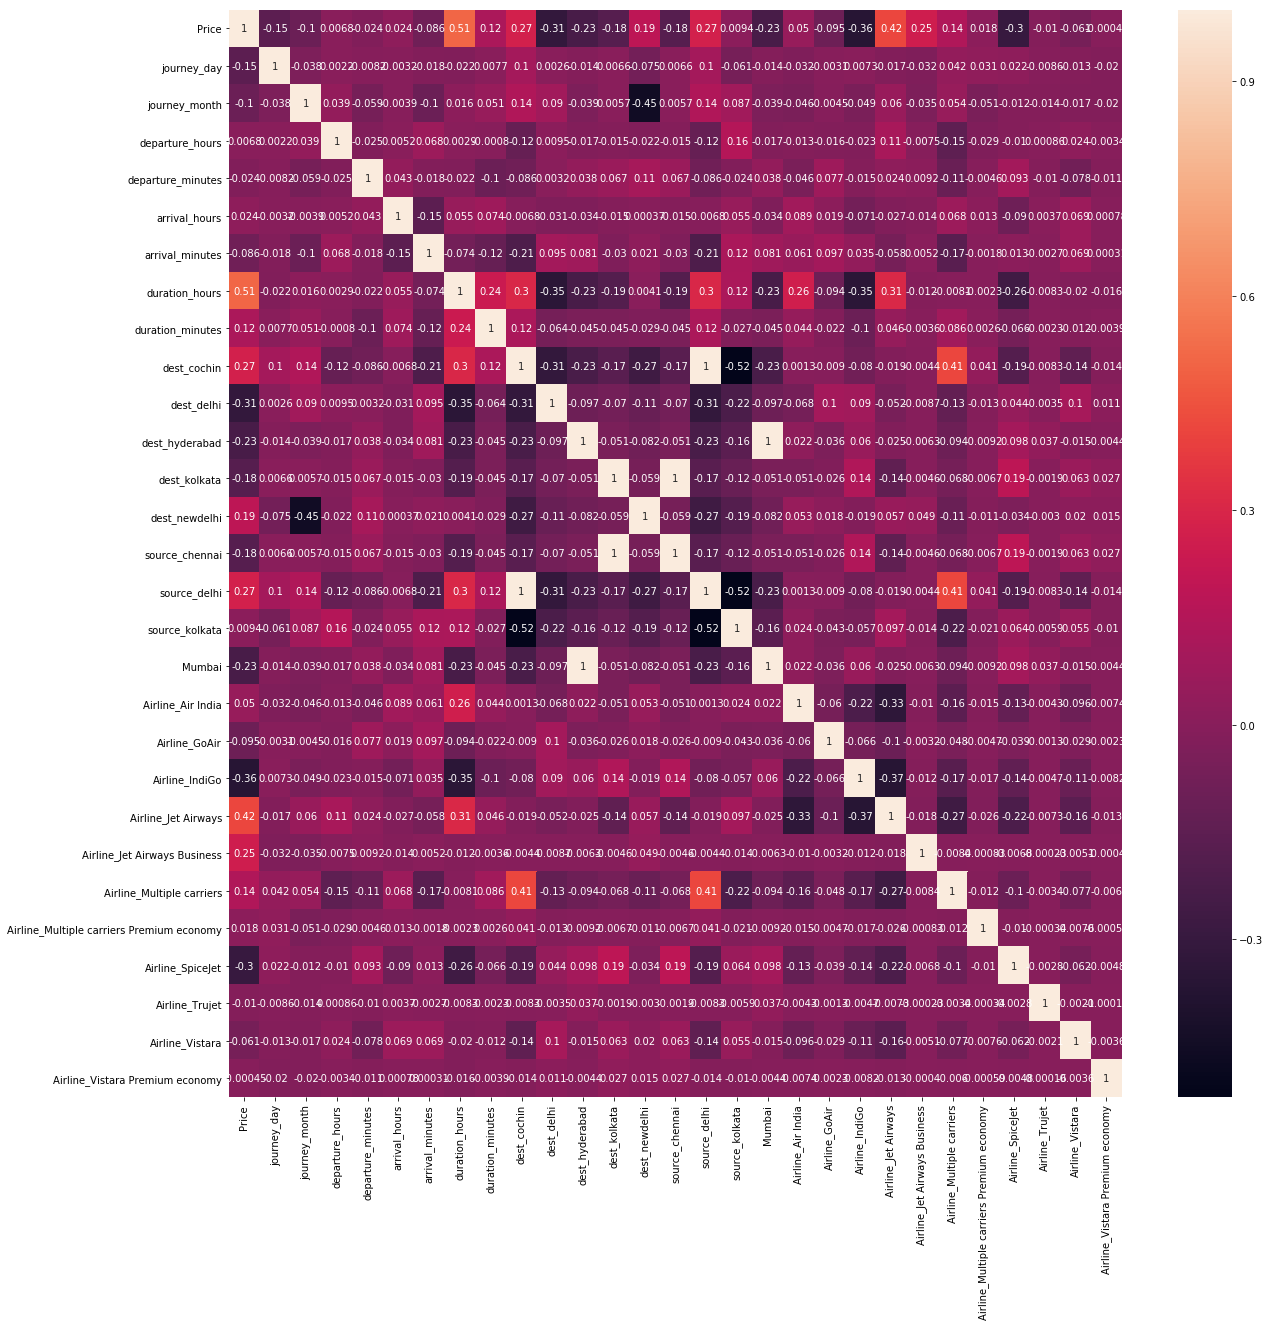

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(final_price_dataset.corr(),annot=True)
plt.show()

In [17]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i  in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [18]:
corr_feature=correlation(final_price_dataset,0.8)

In [19]:
len(corr_feature)

3

In [20]:
corr_feature

{'Mumbai', 'source_chennai', 'source_delhi'}

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.7,random_state=0)

In [23]:
x_train=x_train.drop(corr_feature,axis=1)

In [24]:
x_test=x_test.drop(corr_feature,axis=1)

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
random_regg=RandomForestRegressor()

In [27]:
random_regg.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [28]:
y_predict=random_regg.predict(x_test)

In [29]:
random_regg.score(x_train,y_train)

0.9560659503107463

In [30]:
random_regg.score(x_test,y_test)

0.8029204583342096

In [31]:
from sklearn import metrics

In [32]:
print('mse',metrics.mean_squared_error(y_test,y_predict))
print('rmse',np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print('mae',metrics.mean_absolute_error(y_test,y_predict))
print('r2',metrics.r2_score(y_test,y_predict))

mse 4254940.600427116
rmse 2062.7507363777904
mae 1236.214775841432
r2 0.8029204583342096


In [33]:
#hyperparameter optimization

In [34]:
import pickle

In [50]:
model=open('flight_price_prediction.pkl','wb')

In [51]:
pickle.dump(random_regg,model)

In [52]:
file=open('flight_price_prediction.pkl','rb')
forest=pickle.load(file)

In [56]:
y_predict=forest.predict(x_test)

In [57]:
metrics.r2_score(y_test,y_predict)

0.8029204583342096